In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import warnings
warnings.filterwarnings('ignore')

In [28]:
students = pd.read_csv('StudentsPerformance.csv')
df = pd.DataFrame(students)


In [29]:
print(df.head())
# print(df.shape)
print(f"There are {df.shape[0]} rows in the data with {df.shape[1]} columns")

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
There are 1000 rows in the data with 8 columns


#### Different Unique values in the dataset for each categorical Column

### Categorical Column Overview

Here are the unique values for each categorical feature in the dataset:

- **Gender:** 2 values (`male`, `female`)
- **Parental Level of Education:** 6 values  
  *(e.g., `some high school`, `high school`, `some college`, `associate's degree`, `bachelor's degree`, `master's degree`)*
- **Ethnicity:** 5 groups (`Group A`, `Group B`, `Group C`, `Group D`, `Group E`)
- **Lunch:** 2 values (`standard`, `free/reduced`)
- **Test Preparation Course:** 2 values (`completed`, `none`)


In [30]:
print(df.columns)
print(df['gender'].unique())
print(df['parental level of education'].unique())
print(df['race/ethnicity'].unique())
print(df['lunch'].unique())
print(df['test preparation course'].unique())

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
['female' 'male']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['group B' 'group C' 'group A' 'group D' 'group E']
['standard' 'free/reduced']
['none' 'completed']


In [31]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical_cols = ['math score', 'reading score', 'writing score']

In [32]:
## Count of each colu
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    print(f"For {col}:\n", df[col].value_counts(), "\n\n")



For gender:
 gender
female    518
male      482
Name: count, dtype: int64 


For race/ethnicity:
 race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 


For parental level of education:
 parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 


For lunch:
 lunch
standard        645
free/reduced    355
Name: count, dtype: int64 


For test preparation course:
 test preparation course
none         642
completed    358
Name: count, dtype: int64 




In [33]:
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


### Univariate Analysis

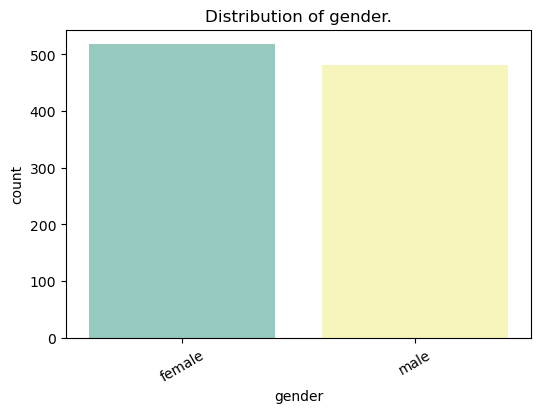

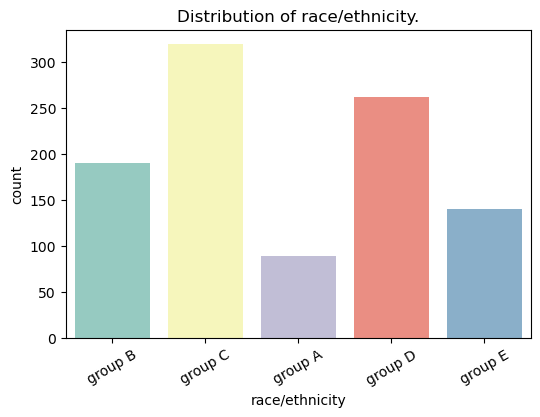

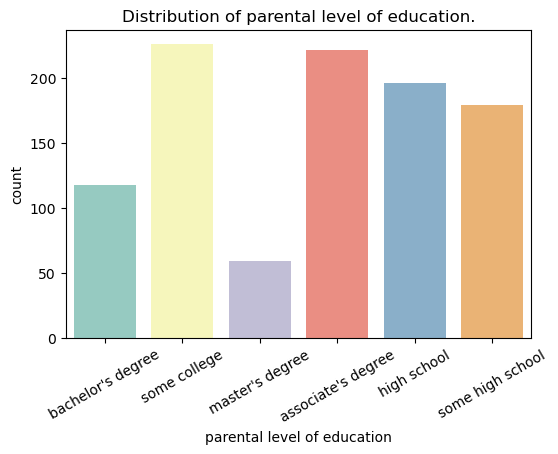

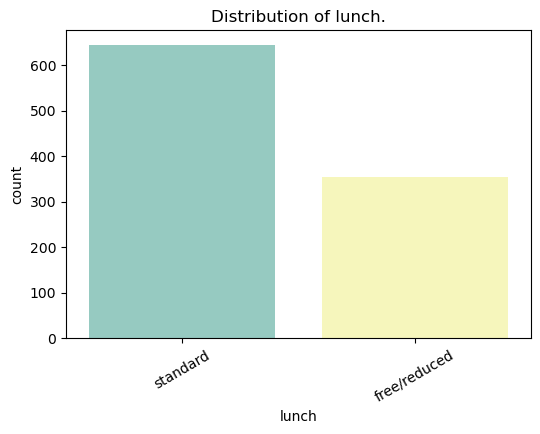

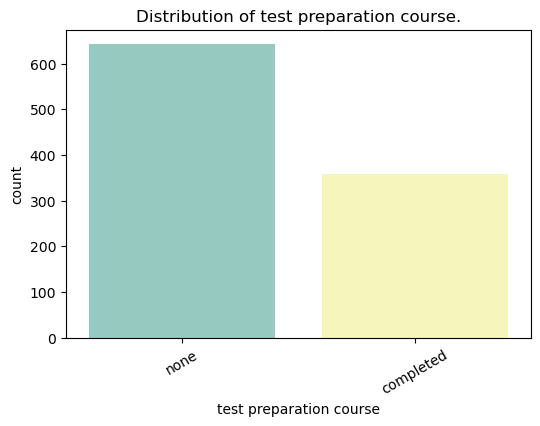

In [34]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette='Set3')
    plt.title(f"Distribution of {col}.")
    plt.xticks(rotation=30)
    plt.show()

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


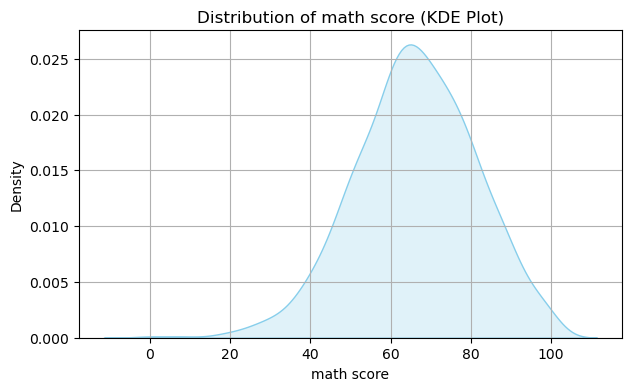

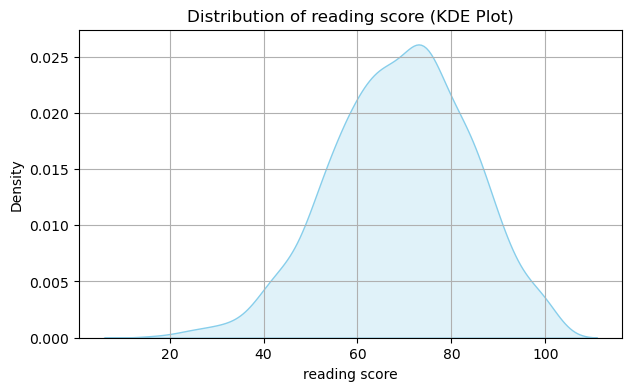

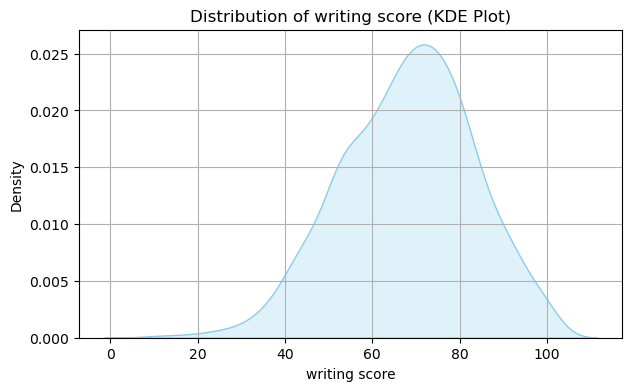

Plotting all KDEs Together


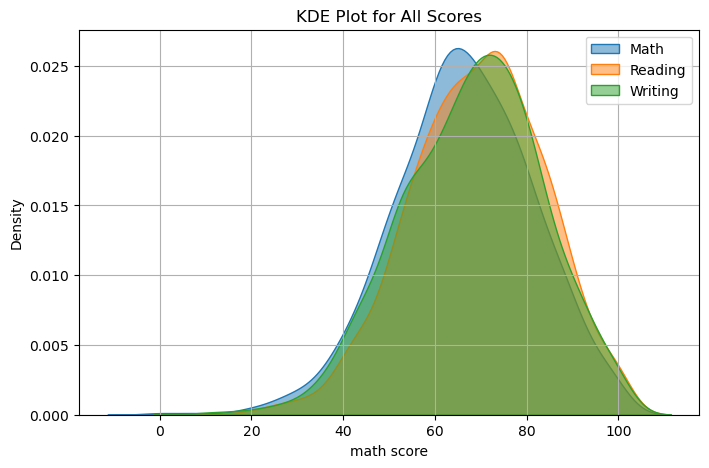

In [42]:
print(df[numerical_cols].describe())
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=df, x=col, fill=True, color='skyblue')
    plt.title(f'Distribution of {col} (KDE Plot)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()



print("Plotting all KDEs Together")
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='math score', fill=True, label='Math', alpha=0.5)
sns.kdeplot(data=df, x='reading score', fill=True, label='Reading', alpha=0.5)
sns.kdeplot(data=df, x='writing score', fill=True, label='Writing', alpha=0.5)
plt.title("KDE Plot for All Scores")
plt.legend()
plt.grid(True)
plt.show()


##### All the numerical columns are normally distributed

### Bivariate Analysis

A boxplot (or box-and-whisker plot) is a graphical representation of the distribution of numerical data through its quartiles.

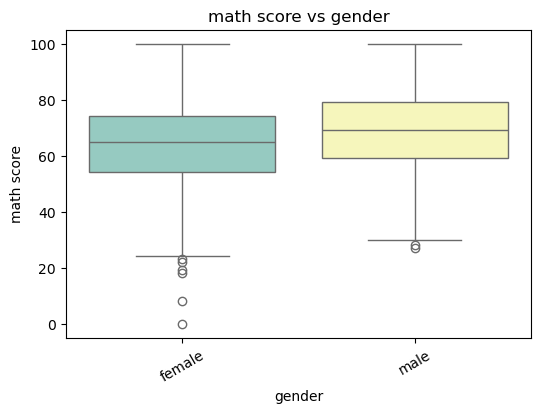

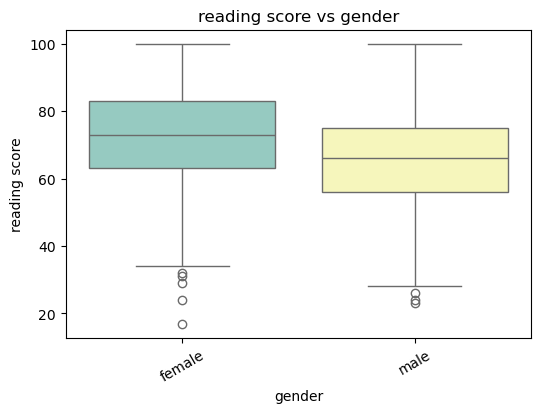

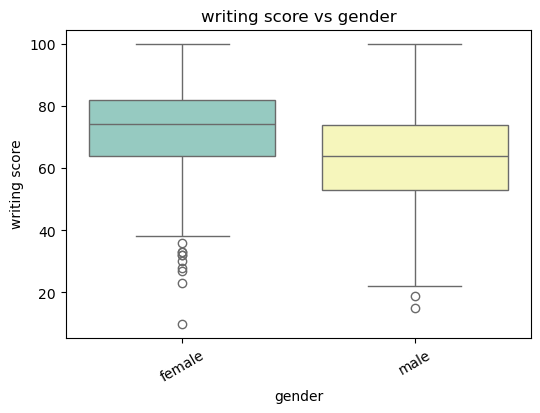

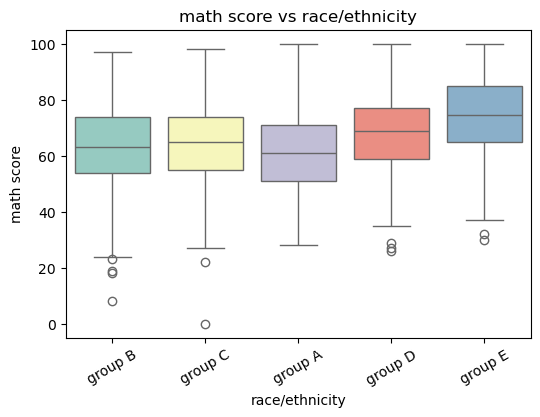

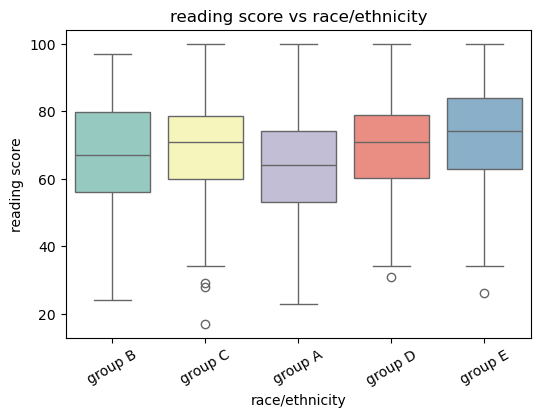

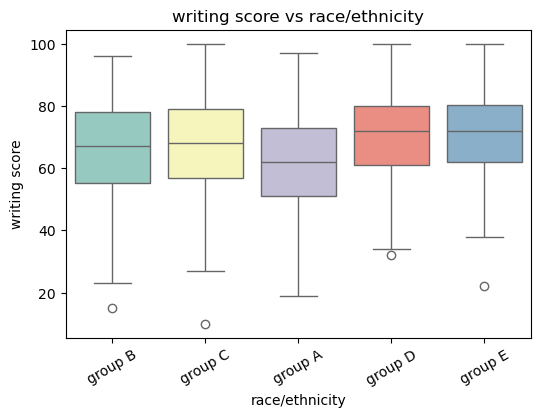

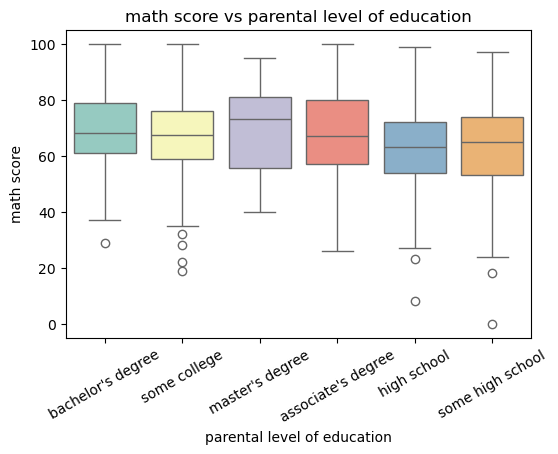

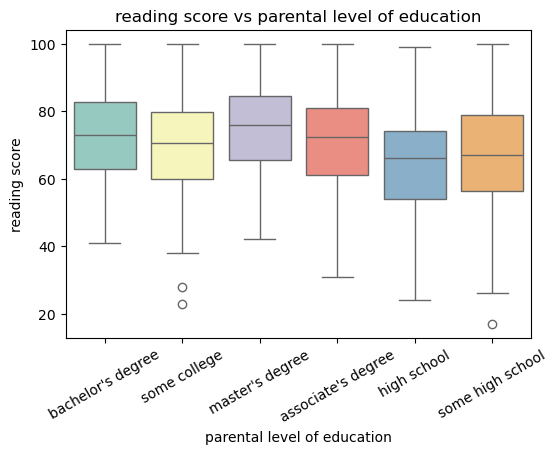

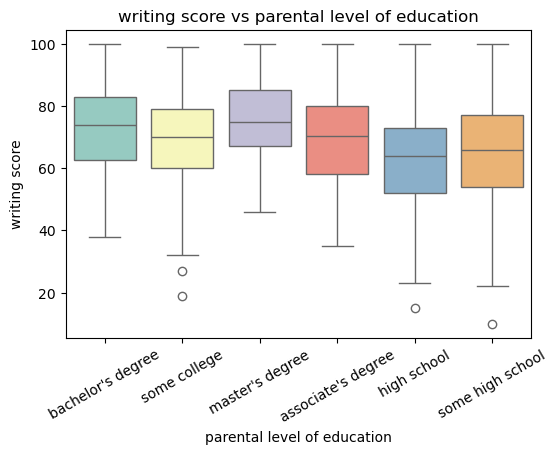

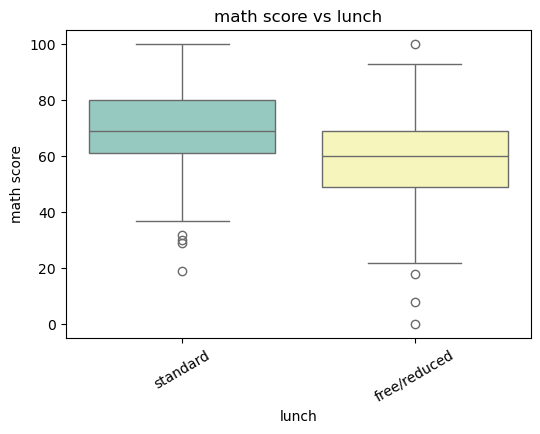

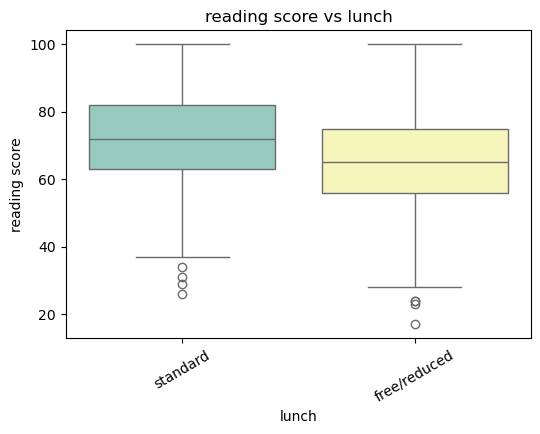

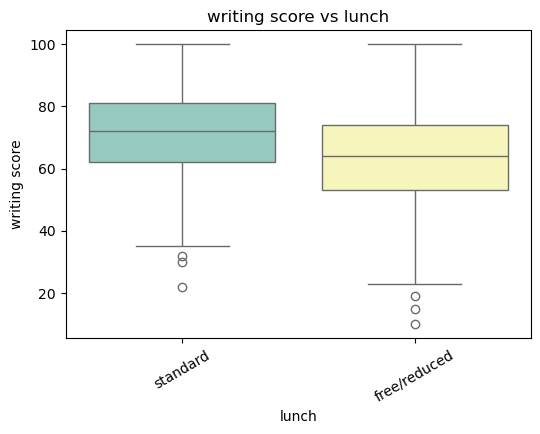

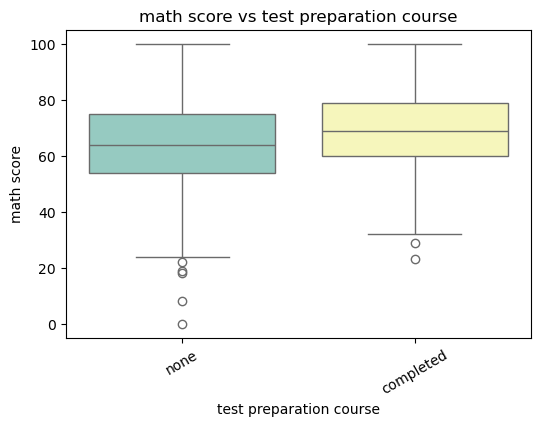

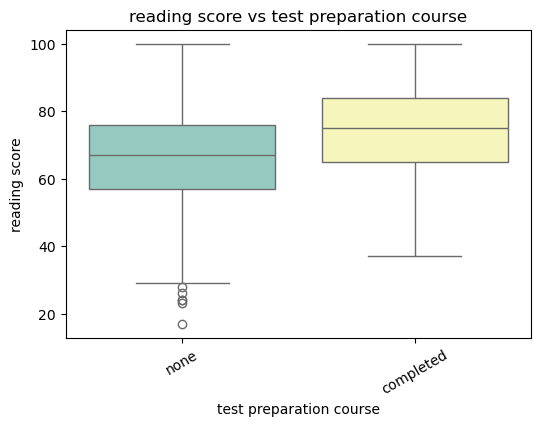

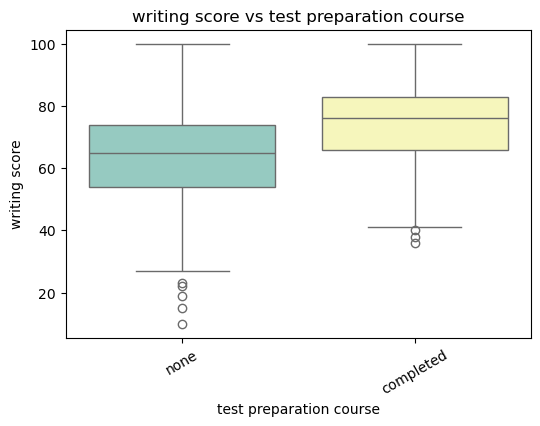

In [36]:
## 
# Boxplot for each category with scores of each tests
for col in categorical_cols:
    for score in numerical_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=col, y=score, data=df, palette='Set3')
        plt.title(f"{score} vs {col}")
        plt.xticks(rotation=30)
        plt.show()


#### Takeaways in Boxplot:
- male Scored better in Mathematics
- female Scored better in Reading and Writing
- Group E has significantly better math scores than other groups
- No such observation in Reading and Writing Scores
- Parental Level of Education does not have influence on the scores of Students
- having Lunch has shows significant improvement in Scores in all three tests
- Test preparation Course boosts performance in Tests, evident in the last three plots

Text(0.5, 0.98, 'Pairwise Score Relationships')

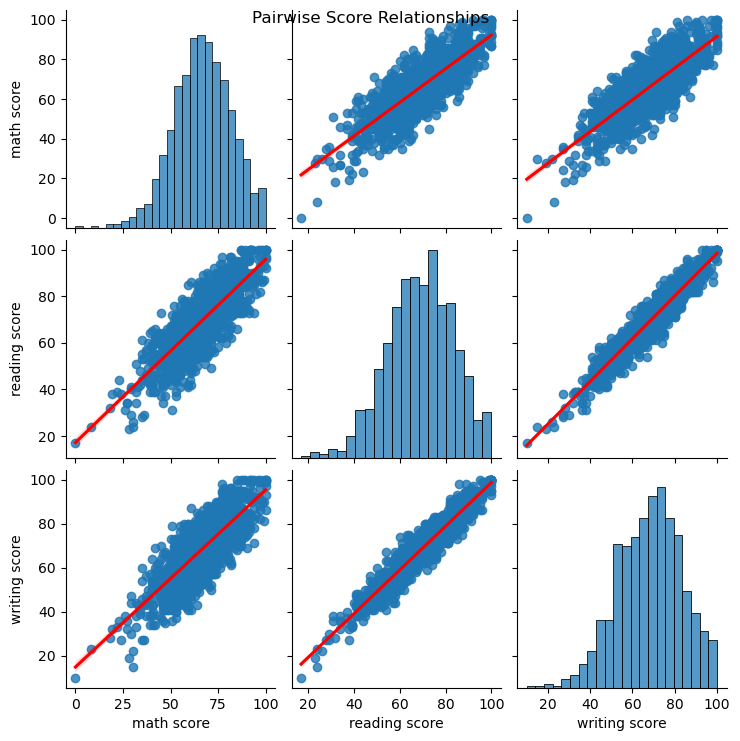

In [37]:
sns.pairplot(df[numerical_cols], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Pairwise Score Relationships")

Text(0.5, 1.0, 'Correlation Heatmap')

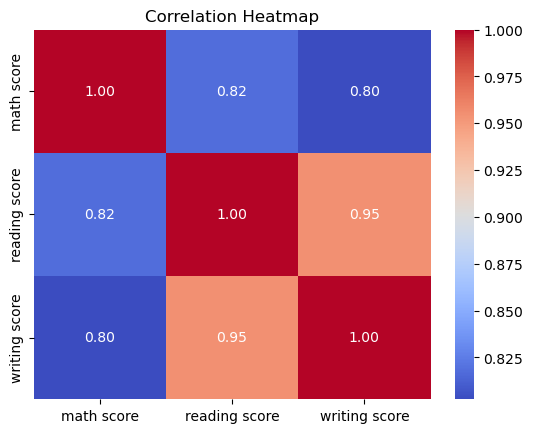

In [44]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")

### Multivariate Analysis

Text(0.5, 1.0, 'Math Score by Gender and Test Prep')

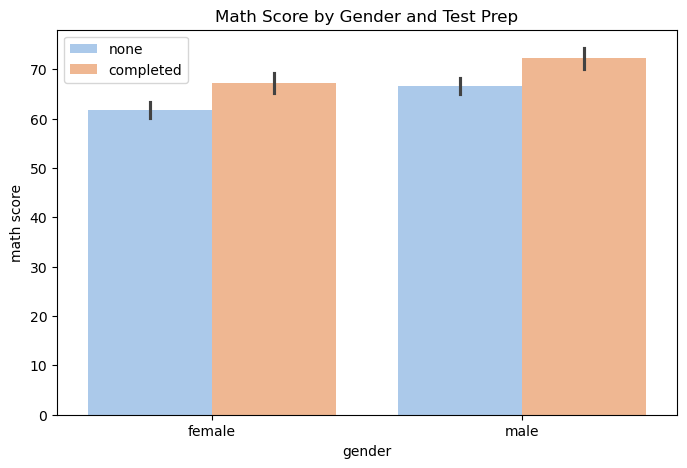

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='math score', hue='test preparation course', data=df, palette='pastel')
plt.legend(loc='upper left')
plt.title("Math Score by Gender and Test Prep",loc='center')

#### Test Preparation course has significant impact in test scores of both male and Female

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

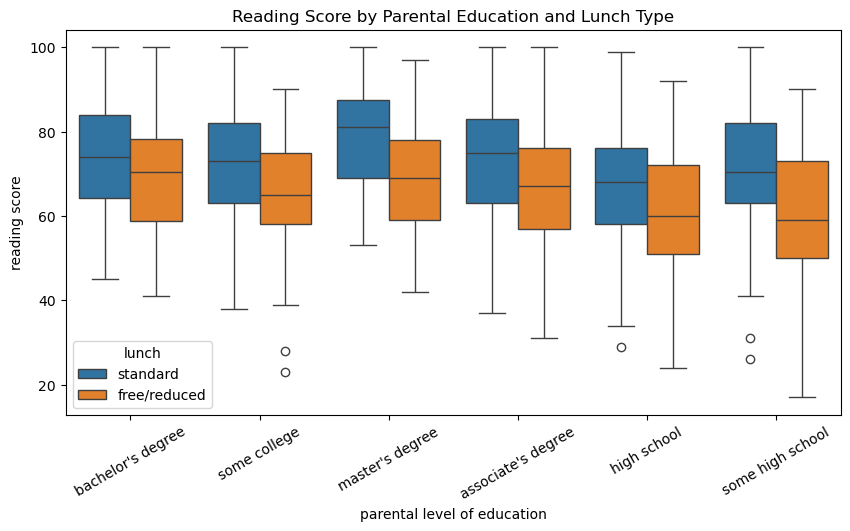

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(x='parental level of education', y='reading score', hue='lunch', data=df)
plt.title("Reading Score by Parental Education and Lunch Type")
plt.xticks(rotation=30)

Bullet Points:

- Students who completed the test prep course generally score higher.

- Female students tend to score better in reading and writing.

- Standard lunch students perform better overall.

- Parental education appears to be loosely correlated with student performance.